In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = '2Hz_20Hz_60ssaturation'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],60000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(60.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current coupled = <PC_Coupled_STDP.I_intrinsic: array([1.96, 2.04, 2.08, 2.  , 1.98, 1.94, 1.9 , 2.02, 2.06, 1.92]) * namp>
intrinsic current uncoupled = <PC_Uncoupled_STDP.I_intrinsic: array([1.96, 2.04, 2.08, 2.  , 1.98, 1.94, 1.9 , 2.02, 2.06, 1.92]) * namp>
t_learn = 5
number of IO 20
nr of noise is 2


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]
<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])>
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


In [5]:
run(exp_runtime,report='text')

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "input_dep_post = (_lio_1 * I_post) / clip(_lio_1 * I_post, amplitude_post + offset_post, 10)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "input_dep = (_lio_1 * I_post) / clip(_lio_1 * I_post, amplitude_post + offset_post, 10)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 6 lines of abstra

Starting simulation at t=0. s for a duration of 60. s
309.025 ms (0%) simulated in 10s, estimated 32m 12s remaining.
0.5955 s (0%) simulated in 20s, estimated 33m 16s remaining.
0.92625 s (1%) simulated in 30s, estimated 31m 54s remaining.
1.094025 s (1%) simulated in 40s, estimated 35m 54s remaining.
1.214025 s (2%) simulated in 50s, estimated 40m 24s remaining.
1.362025 s (2%) simulated in 1m 0s, estimated 43m 8s remaining.
1.477025 s (2%) simulated in 1m 10s, estimated 46m 19s remaining.
1.611025 s (2%) simulated in 1m 20s, estimated 48m 26s remaining.
1.756925 s (2%) simulated in 1m 30s, estimated 49m 49s remaining.
1.88235 s (3%) simulated in 1m 40s, estimated 51m 33s remaining.
2.022025 s (3%) simulated in 1m 50s, estimated 52m 39s remaining.
2.164275 s (3%) simulated in 2m 0s, estimated 53m 32s remaining.
2.280025 s (3%) simulated in 2m 10s, estimated 54m 56s remaining.
2.424025 s (4%) simulated in 2m 20s, estimated 55m 31s remaining.
2.5584 s (4%) simulated in 2m 30s, estimated

14.814125 s (24%) simulated in 20m 12s, estimated 1h 1m 37s remaining.
14.936025 s (24%) simulated in 20m 22s, estimated 1h 1m 27s remaining.
15.066025 s (25%) simulated in 20m 32s, estimated 1h 1m 15s remaining.
15.189025 s (25%) simulated in 20m 42s, estimated 1h 1m 4s remaining.
15.30865 s (25%) simulated in 20m 52s, estimated 1h 0m 55s remaining.
15.427025 s (25%) simulated in 21m 2s, estimated 1h 0m 47s remaining.
15.5363 s (25%) simulated in 21m 12s, estimated 1h 0m 41s remaining.
15.646025 s (26%) simulated in 21m 22s, estimated 1h 0m 35s remaining.
15.765025 s (26%) simulated in 21m 32s, estimated 1h 0m 26s remaining.
15.8785 s (26%) simulated in 21m 42s, estimated 1h 0m 18s remaining.
15.991025 s (26%) simulated in 21m 52s, estimated 1h 0m 11s remaining.
16.099625 s (26%) simulated in 22m 2s, estimated 1h 0m 5s remaining.
16.210025 s (27%) simulated in 22m 12s, estimated 59m 59s remaining.
16.328025 s (27%) simulated in 22m 22s, estimated 59m 50s remaining.
16.443025 s (27%) s

28.093025 s (46%) simulated in 40m 14s, estimated 45m 42s remaining.
28.192025 s (46%) simulated in 40m 24s, estimated 45m 36s remaining.
28.297025 s (47%) simulated in 40m 34s, estimated 45m 28s remaining.
28.404025 s (47%) simulated in 40m 44s, estimated 45m 19s remaining.
28.513025 s (47%) simulated in 40m 54s, estimated 45m 11s remaining.
28.627025 s (47%) simulated in 41m 4s, estimated 45m 1s remaining.
28.728025 s (47%) simulated in 41m 14s, estimated 44m 54s remaining.
28.833025 s (48%) simulated in 41m 24s, estimated 44m 46s remaining.
28.938875 s (48%) simulated in 41m 34s, estimated 44m 38s remaining.
29.041025 s (48%) simulated in 41m 44s, estimated 44m 30s remaining.
29.141025 s (48%) simulated in 41m 54s, estimated 44m 23s remaining.
29.249025 s (48%) simulated in 42m 4s, estimated 44m 15s remaining.
29.33865 s (48%) simulated in 42m 14s, estimated 44m 9s remaining.
29.439025 s (49%) simulated in 42m 24s, estimated 44m 2s remaining.
29.533025 s (49%) simulated in 42m 35s, 

41.975025 s (69%) simulated in 1h 0m 17s, estimated 25m 53s remaining.
42.076025 s (70%) simulated in 1h 0m 27s, estimated 25m 45s remaining.
42.176025 s (70%) simulated in 1h 0m 37s, estimated 25m 37s remaining.
42.277025 s (70%) simulated in 1h 0m 47s, estimated 25m 29s remaining.
42.378025 s (70%) simulated in 1h 0m 57s, estimated 25m 21s remaining.
42.478025 s (70%) simulated in 1h 1m 7s, estimated 25m 13s remaining.
42.580025 s (70%) simulated in 1h 1m 17s, estimated 25m 5s remaining.
42.676025 s (71%) simulated in 1h 1m 27s, estimated 24m 57s remaining.
42.774025 s (71%) simulated in 1h 1m 37s, estimated 24m 49s remaining.
42.8757 s (71%) simulated in 1h 1m 47s, estimated 24m 41s remaining.
42.974025 s (71%) simulated in 1h 1m 57s, estimated 24m 33s remaining.
43.073725 s (71%) simulated in 1h 2m 7s, estimated 24m 25s remaining.
43.172025 s (71%) simulated in 1h 2m 17s, estimated 24m 17s remaining.
43.271625 s (72%) simulated in 1h 2m 27s, estimated 24m 9s remaining.
43.371025 s 

53.178025 s (88%) simulated in 1h 19m 40s, estimated 10m 13s remaining.
53.270025 s (88%) simulated in 1h 19m 50s, estimated 10m 5s remaining.
53.364025 s (88%) simulated in 1h 20m 0s, estimated 9m 57s remaining.
53.457025 s (89%) simulated in 1h 20m 10s, estimated 9m 49s remaining.
53.549025 s (89%) simulated in 1h 20m 21s, estimated 9m 41s remaining.
53.638025 s (89%) simulated in 1h 20m 31s, estimated 9m 33s remaining.
53.729025 s (89%) simulated in 1h 20m 41s, estimated 9m 25s remaining.
53.819025 s (89%) simulated in 1h 20m 51s, estimated 9m 17s remaining.
53.909025 s (89%) simulated in 1h 21m 1s, estimated 9m 9s remaining.
54.001975 s (90%) simulated in 1h 21m 11s, estimated 9m 1s remaining.
54.091025 s (90%) simulated in 1h 21m 21s, estimated 8m 53s remaining.
54.1795 s (90%) simulated in 1h 21m 31s, estimated 8m 45s remaining.
54.269025 s (90%) simulated in 1h 21m 41s, estimated 8m 38s remaining.
54.361025 s (90%) simulated in 1h 21m 51s, estimated 8m 29s remaining.
54.453025 s

In [6]:
#run(exp_runtime,report='text')

['frequency =2', 'frequency =20']


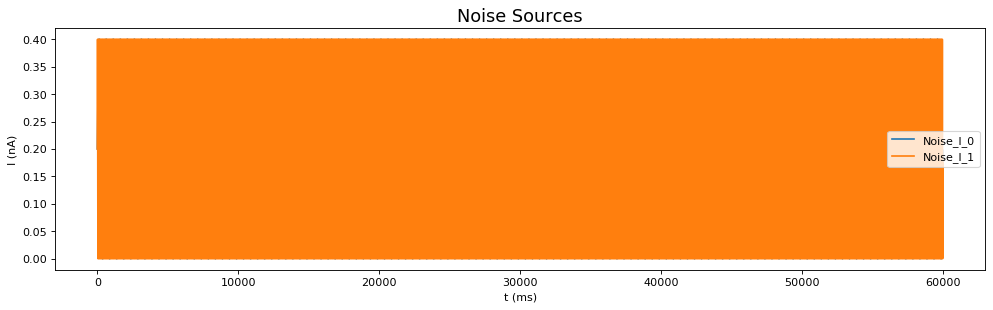

Plasticity


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


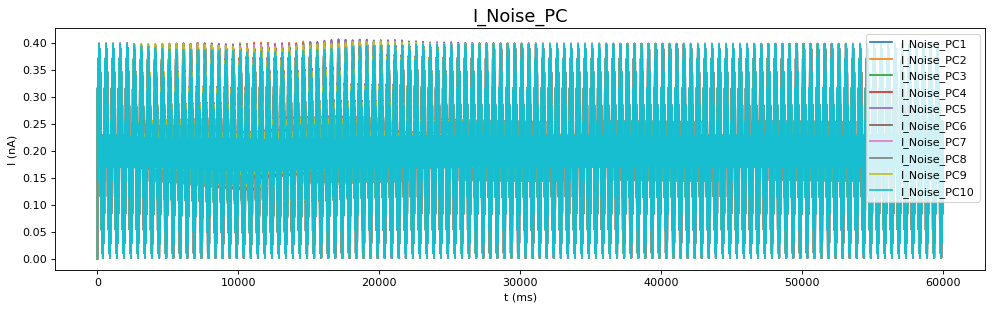

Plasticity Coupled Scenario


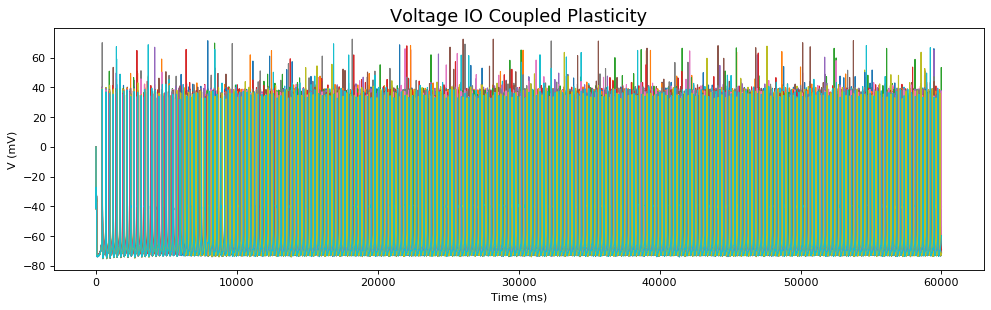

Number of spikes DCN: 1949
Number of spikes DCN: 2358
Number of spikes DCN: 2059
Number of spikes DCN: 2214
Number of spikes DCN: 2098
Number of spikes DCN: 1855
Number of spikes DCN: 2225
Number of spikes DCN: 2429
Number of spikes DCN: 1890
Number of spikes DCN: 2143


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


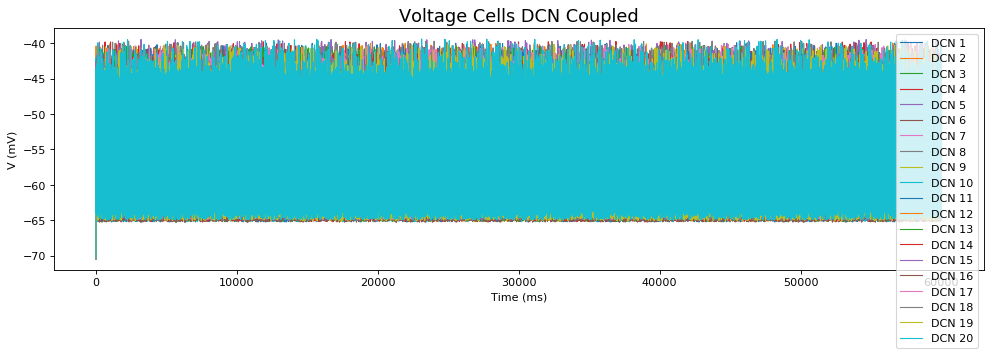

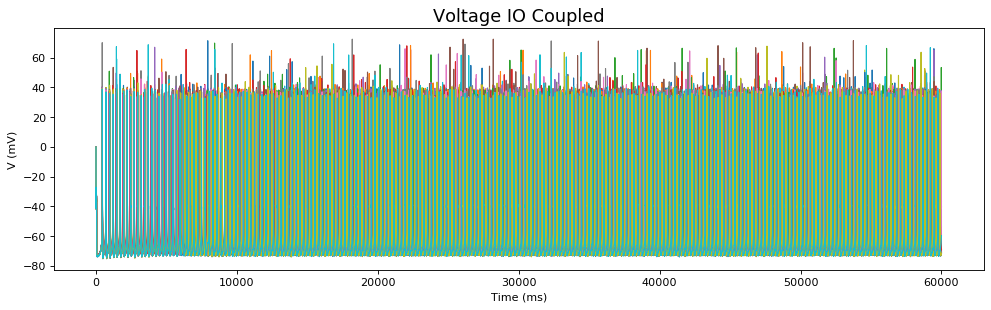

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


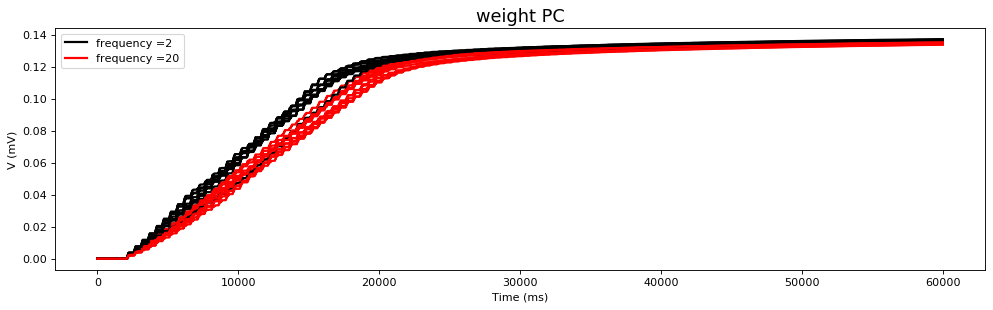

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


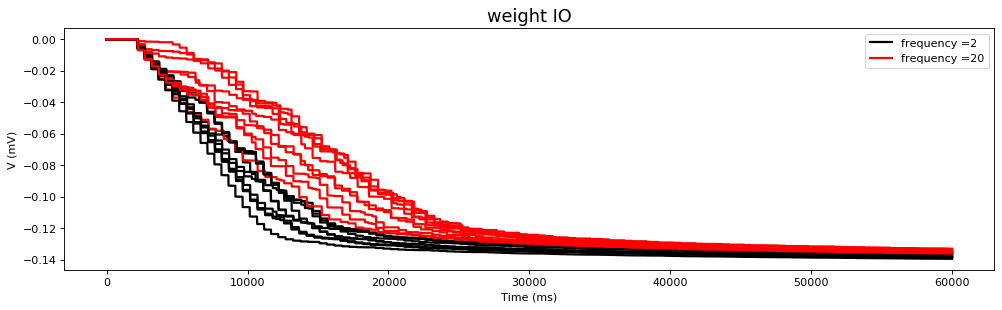

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


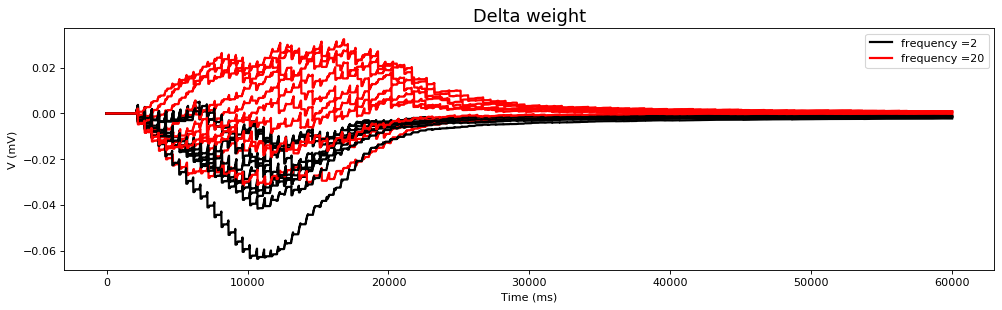

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


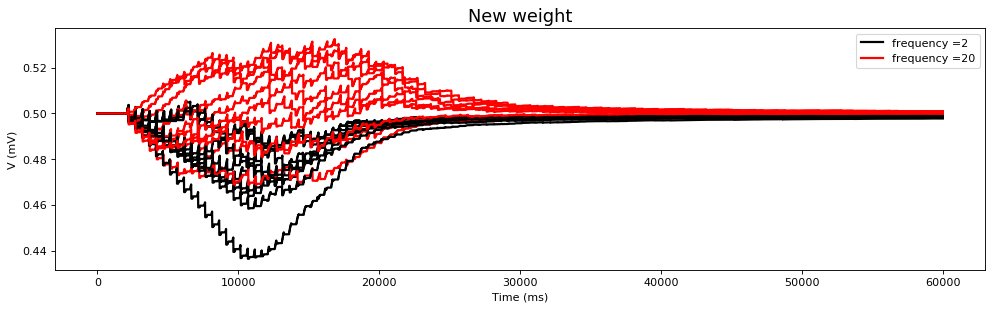

Plasticity Uncoupled Scenario


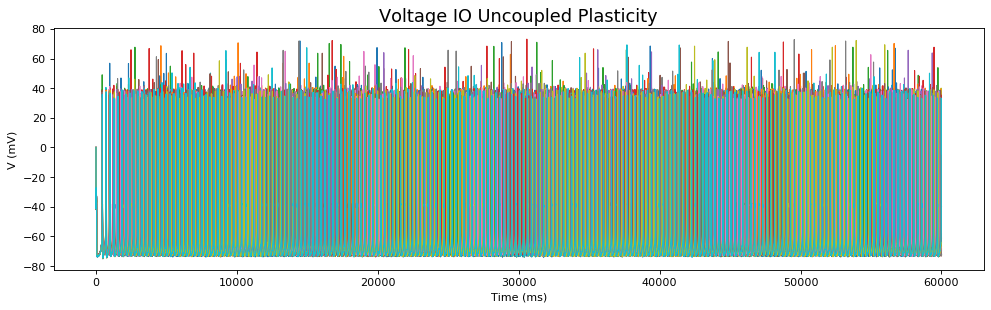

Number of spikes DCN: 1921
Number of spikes DCN: 2326
Number of spikes DCN: 2009
Number of spikes DCN: 2205
Number of spikes DCN: 2086
Number of spikes DCN: 1824
Number of spikes DCN: 2199
Number of spikes DCN: 2287
Number of spikes DCN: 1855
Number of spikes DCN: 2143


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


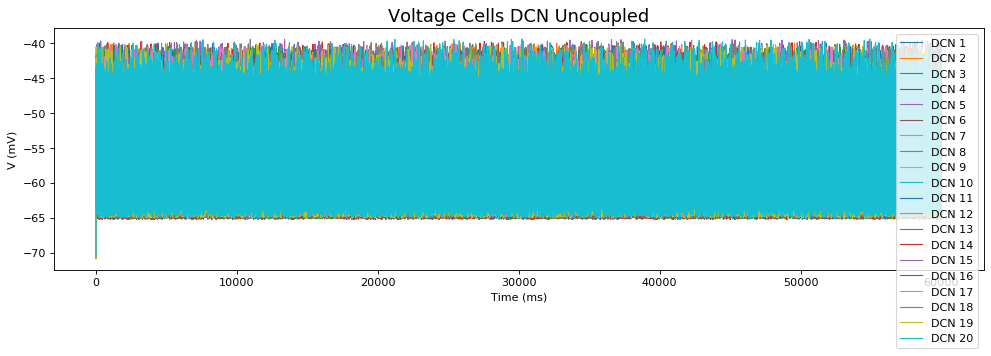

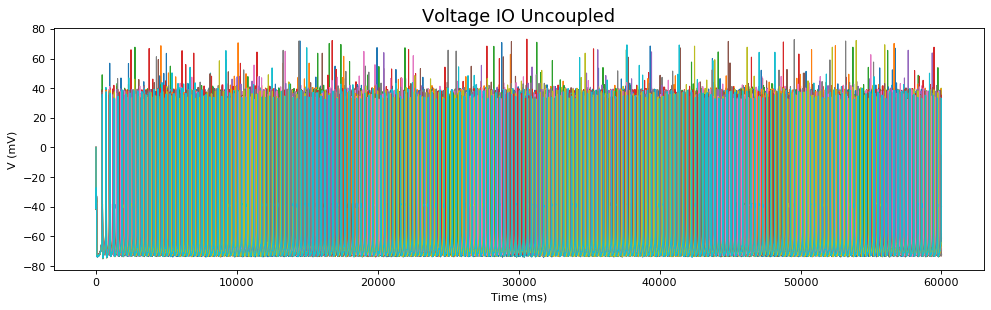

<Figure size 1200x320 with 0 Axes>

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


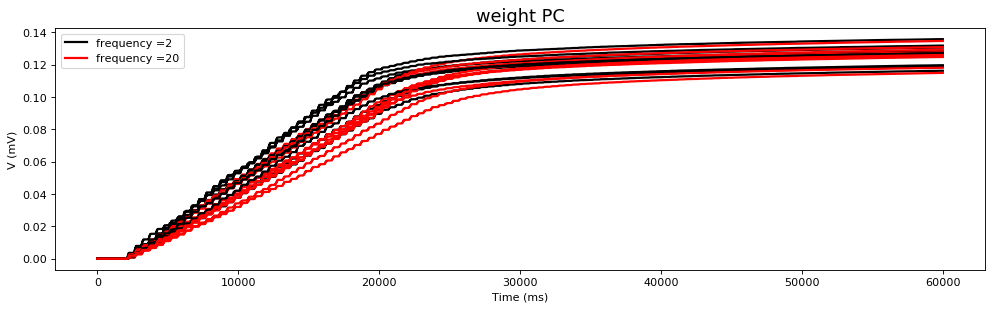

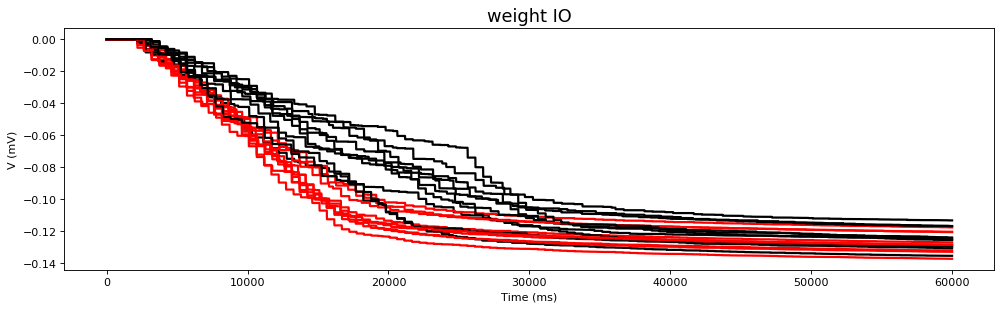

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


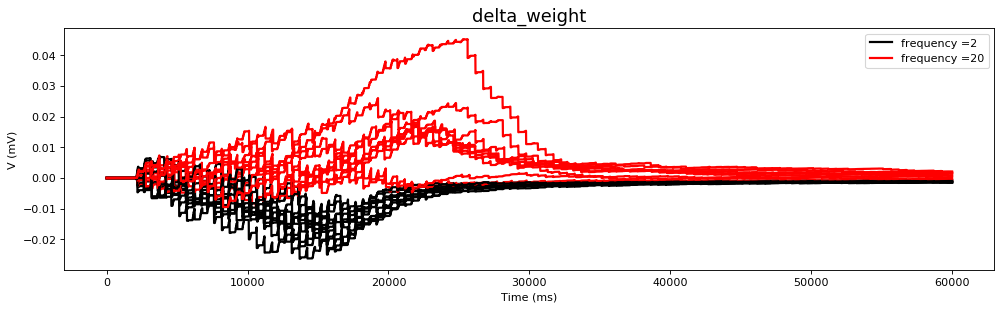

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


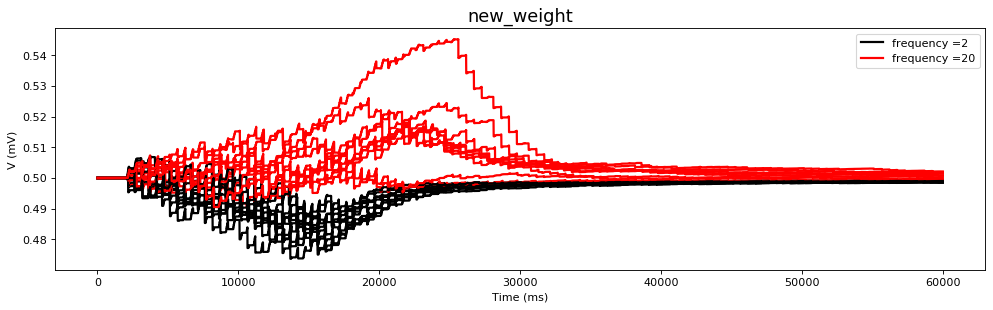

In [7]:
from G_Plot_Plasticity import *

In [8]:
#from F_save_data_Plasticity import *

In [9]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


[0. 0. 0. ... 1. 1. 1.]
[[0.         0.         0.         ... 0.01407861 0.01407861 0.01407861]
 [0.         0.         0.         ... 0.02026912 0.02026912 0.02026912]
 [0.         0.         0.         ... 0.01891047 0.01891047 0.01891047]
 ...
 [0.         0.         0.         ... 0.01900278 0.01900278 0.01900278]
 [0.         0.         0.         ... 0.02188935 0.02188935 0.02188935]
 [0.         0.         0.         ... 0.03416861 0.03416861 0.03416861]]
[0.00000000e+00 1.00001667e+00 2.00003333e+00 ... 5.99980000e+04
 5.99990000e+04 6.00000000e+04]


<IPython.core.display.Javascript object>


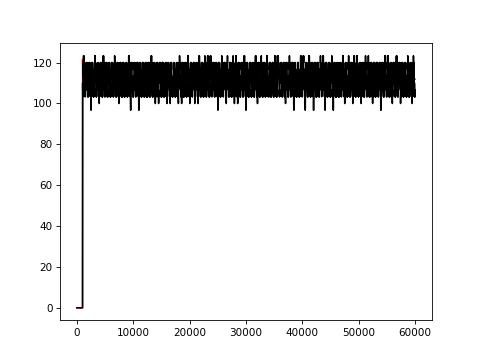

<IPython.core.display.Javascript object>


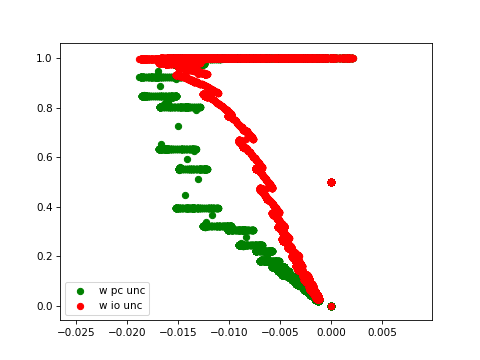

<IPython.core.display.Javascript object>


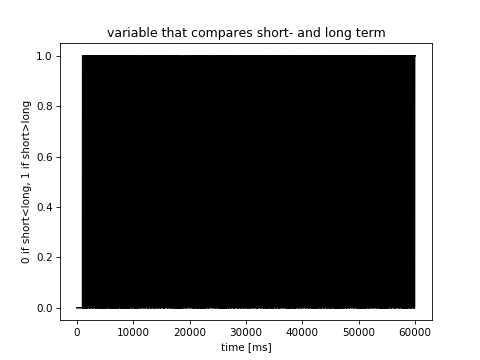

<IPython.core.display.Javascript object>


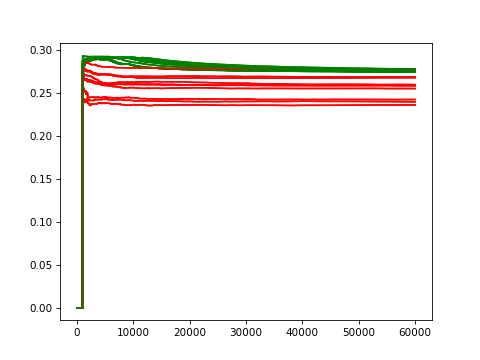

<IPython.core.display.Javascript object>


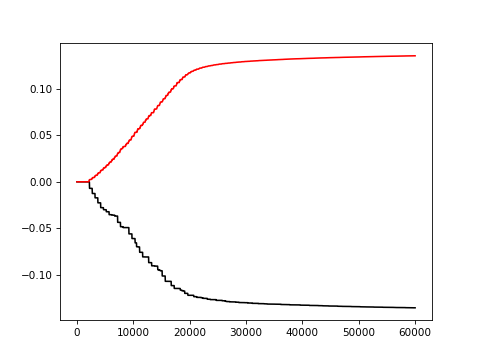

0.4642
20


In [14]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(59000))
print(y_post)
print(mon_N_PC_Uncoupled.w_IO_uncoupled)
x=np.linspace(0,len(y_post),len(y_post))
print(x)
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,2):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.scatter(x,mon_N_PC_Coupled.freq_dep[k])
    #plt.scatter(x,mon_N_PC_Uncoupled.freq_dep[k])
    #plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
    
#plt.legend(['w io coupled', 'w pc coupled'])
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,2):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.w_IO[k],color='red')
    #plt.plot(mon_N_PC_Coupled.w_PC[k],color='black')
    
    plt.scatter(mon_N_PC_Uncoupled.delta_weight[k],mon_N_PC_Uncoupled.w_IO_uncoupled[k],color='green')
    plt.scatter(mon_N_PC_Uncoupled.delta_weight[k],mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='red')
    
    #plt.plot(mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='blue')
plt.legend(['w pc unc', 'w io unc'])
plt.figure()
plt.title('variable that compares short- and long term')
for k in range(0,1):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    
    y= y_post*(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k]/((y_post-1)+mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k]))
    yw= y_post*(mon_N_PC_Coupled.f_lt_PC_coupled[k]/((y_post-1)+mon_N_PC_Coupled.f_st_PC_coupled[k]))

    y = np.floor(y)
    yw = np.floor(yw)
    #plt.plot(y,color='blue',linestyle='-')
    plt.plot(yw,color='black',linestyle='-')
plt.xlabel('time [ms]')
plt.ylabel('0 if short<long, 1 if short>long')
plt.show()
#plt.title('distribution uncoupled')
plt.figure()
for k in range(0,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.freq_dep[k],color='red')
    #plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
    #plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='green')

#plt.legend(['long term', 'short term'])
plt.figure()
plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
plt.show()
print(sum(yw)/len(y_post))
print(len(mon_N_PC_Coupled.input_dep))


In [11]:
from F_save_data_Plasticity import *

<IPython.core.display.Javascript object>


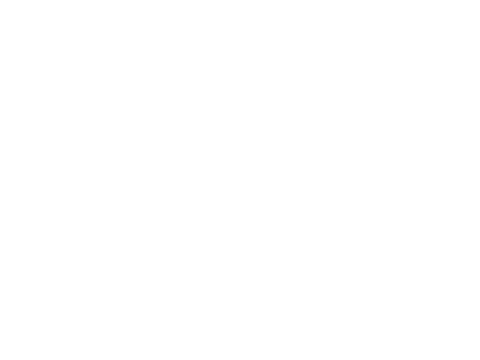

<IPython.core.display.Javascript object>


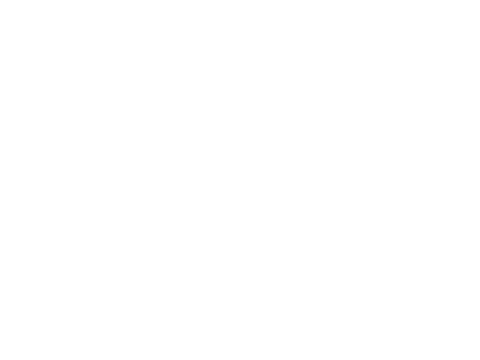

AttributeError: No attribute with name mean_freq_IO_uncoupled

In [12]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

In [ ]:
print(np.floor(-0.1))